In [97]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [98]:
dengue_features = pd.read_csv('../data/dengue_features_train.csv')
dengue_labels = pd.read_csv('../data/dengue_labels_train.csv')

In [99]:
dengue_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [100]:
dengue_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [101]:
dengue_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


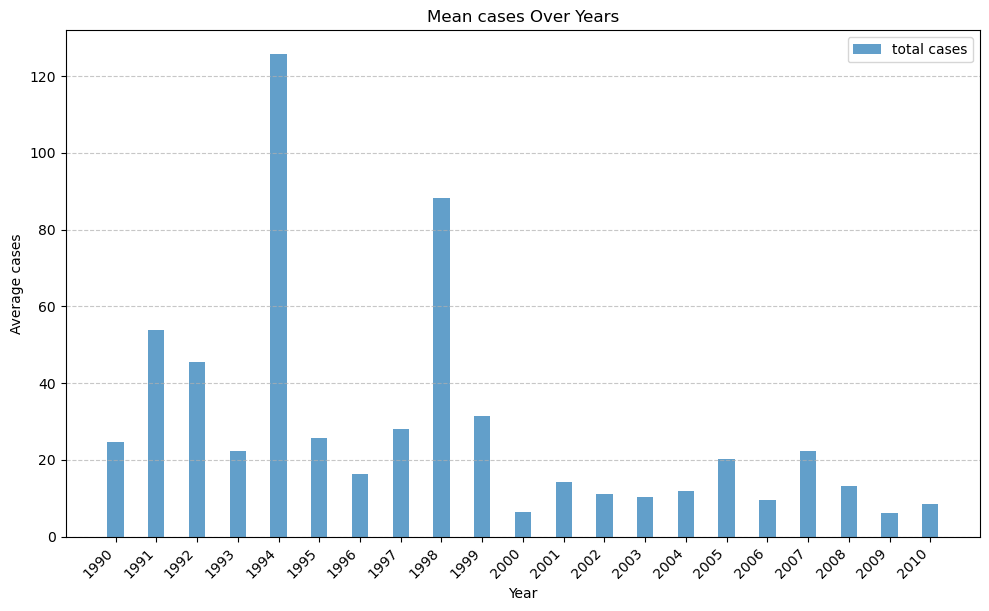

In [102]:
years = dengue_labels['year'].unique()
y = [dengue_labels[dengue_labels['year'] == year]['total_cases'].mean() for year in years]
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(years, y, width=0.4, label='total cases', alpha=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('Average cases')
ax.set_title('Mean cases Over Years')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(years)
ax.set_xticklabels(years.astype(int))
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [103]:
merged_df = pd.merge(dengue_labels, dengue_features, on=['city','year', 'weekofyear'], how='inner')
merged_df.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


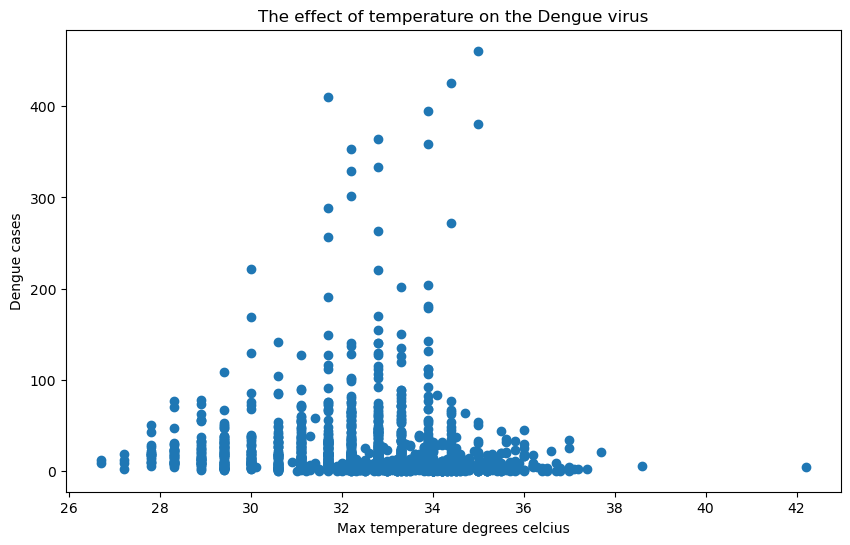

In [104]:
plt.figure(figsize=(10, 6))
y = merged_df['total_cases']
x = merged_df['station_max_temp_c']
plt.title('The effect of temperature on the Dengue virus')
plt.ylabel('Dengue cases')
plt.xlabel('Max temperature degrees celcius')
plt.scatter(x,y)
plt.show()

In [105]:
mean_cases_with_optimum_temp = merged_df[(merged_df['station_max_temp_c'] > 31) & (merged_df['station_max_temp_c'] < 33)]
print('The mean total of cases with the temperature being at its optimal temperature:', mean_cases_with_optimum_temp['total_cases'].mean())

The mean total of cases with the temperature being at its optimal temperature: 31.12226277372263


In [106]:
dengue_features.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [107]:
cols_with_nan_values = dengue_features.columns[dengue_features.isna().sum() > 0].tolist()

In [108]:
for col in cols_with_nan_values:
    print(col)
    dengue_features[col] = dengue_features[col].fillna(dengue_features[col].mean())
# Big improvement from doing this:
'''
for col in merged_df.columns[4:]:
    #print(col)
    meanOfRow = merged_df.loc[:,col].mean()
    #print("mean: ", meanOfRow)
    rowIndex = merged_df.columns.get_loc(col)
    for index, row in enumerate(merged_df[col]):
        if pd.isna(merged_df.iloc[index,rowIndex]):
            merged_df.iloc[index,rowIndex] = meanOfRow
'''


ndvi_ne
ndvi_nw
ndvi_se
ndvi_sw
precipitation_amt_mm
reanalysis_air_temp_k
reanalysis_avg_temp_k
reanalysis_dew_point_temp_k
reanalysis_max_air_temp_k
reanalysis_min_air_temp_k
reanalysis_precip_amt_kg_per_m2
reanalysis_relative_humidity_percent
reanalysis_sat_precip_amt_mm
reanalysis_specific_humidity_g_per_kg
reanalysis_tdtr_k
station_avg_temp_c
station_diur_temp_rng_c
station_max_temp_c
station_min_temp_c
station_precip_mm


'\nfor col in merged_df.columns[4:]:\n    #print(col)\n    meanOfRow = merged_df.loc[:,col].mean()\n    #print("mean: ", meanOfRow)\n    rowIndex = merged_df.columns.get_loc(col)\n    for index, row in enumerate(merged_df[col]):\n        if pd.isna(merged_df.iloc[index,rowIndex]):\n            merged_df.iloc[index,rowIndex] = meanOfRow\n'

In [109]:
float_columns = dengue_features.select_dtypes(include='float64').columns
float_columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [110]:
from sklearn.preprocessing import MinMaxScaler

# Normalising data
scaler = MinMaxScaler()
dengue_features[float_columns] = scaler.fit_transform(dengue_features[float_columns])

In [111]:
dengue_features

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.578226,0.614835,0.386418,0.395544,0.031797,0.388291,...,0.056091,0.381614,0.031797,0.262659,0.086660,0.430091,0.210393,0.174194,0.486239,0.029450
1,sj,1990,19,1990-05-07,0.629943,0.657063,0.321190,0.359233,0.058423,0.472710,...,0.031446,0.479668,0.058423,0.418164,0.069133,0.565350,0.163498,0.322581,0.688073,0.015829
2,sj,1990,20,1990-05-14,0.479441,0.690881,0.311879,0.384430,0.088428,0.548064,...,0.045749,0.594415,0.088428,0.586900,0.064265,0.565350,0.173638,0.354839,0.743119,0.076201
3,sj,1990,21,1990-05-21,0.584823,0.770066,0.438912,0.491150,0.039324,0.575260,...,0.024365,0.552387,0.039324,0.566808,0.073028,0.645897,0.198986,0.425806,0.788991,0.007362
4,sj,1990,22,1990-05-28,0.658698,0.788882,0.481601,0.509943,0.019252,0.645515,...,0.021385,0.555396,0.019252,0.628226,0.112950,0.802432,0.429658,0.535484,0.844037,0.010676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.818931,0.851154,0.490886,0.584064,0.141577,0.621152,...,0.078878,0.758854,0.141577,0.774093,0.575463,0.769504,0.656950,0.561290,0.706422,0.049696
1452,iq,2010,22,2010-06-04,0.619290,0.677048,0.273679,0.474367,0.221377,0.488385,...,0.363015,0.828282,0.221377,0.726560,0.416748,0.641844,0.529785,0.516129,0.642202,0.067366
1453,iq,2010,23,2010-06-11,0.714304,0.661327,0.480079,0.487587,0.150896,0.259490,...,0.088694,0.893932,0.150896,0.605194,0.418695,0.319149,0.210393,0.354839,0.412844,0.013620
1454,iq,2010,24,2010-06-18,0.809270,0.770839,0.531588,0.638162,0.152765,0.226062,...,0.109255,0.903240,0.152765,0.583143,0.444012,0.429078,0.373046,0.290323,0.577982,0.029450


In [112]:
merged_df = pd.merge(dengue_labels, dengue_features, on=['city','year', 'weekofyear'], how='inner')
merged_df.to_csv('../data/cleaned_dengue_merged.csv',index = False, header=True,sep=',',encoding='utf-8-sig')